## **Introduction**
Employees are the backbone of any organization. The success of an organization is heavily dependent on committed employees who are motivated and productive to carry out a company's goals and objectives.

Thus, **employee attrition, the rate at which employees leave their job**, hurts the growth and performance of an organization in terms of financial profit, productivity, and time. However, attrition is an inevitable part of any business. There will come a time when an employees wants to leave a company, which can happen for many reasons. For instance, employees might be seeking for better opportunities, mentally illed, working excessive hours, working in a toxic atmosphere or under bad management, etc. But when attrition reaches a particular threshold, it becomes a concern to be addressed as it may be reflecting a deep problem with the company culture. Attrition is particularly concerning when the attrition rate is high, indicating that employees are turning over pretty quickly, or when early attrition rate is high, indicating new joiners leave the company within the first few years of employment. Therefore, it is important to ask questions, find out why people are leaving, and understand what is influencing attrition rate within an organization.

The most important question to ask is what factors are contributing to more employee attrition? Thus, by understanding these reasons for employee attrition, a company can take the correct measures to retain their employees.


To explore these correlations, we used an IBM Employee Attrition dataset to explore and visualize interesting and significant factors that lead to higher employee attrition.

For this project, we have used an IBM employee data set hosted on Kaggle that contains various personal and professional information about an employee (i.e. Attrition, Age, Monthly Income, etc). The dataset was last updated in 2017 and does not have any missing data, which makes it easier to work with.

In total, there are **1470** observations (rows) and each observation represents an employee. There are **35** variables (columns) and below are the variables contained in the dataset:

*   **Age**: Employee age
*   **Attrition**: if the employee leaves the job
*   **BusinessTravel**: The frequency of job travels
*   **DailyRate**: Billing cost for employee's services for a single day
*   **Department**: Employee work department
*   **DistanceFromHome**: Distance traveled to work from home
*   **Education**: Employee education level (1 = Below College, 2 = College, 3 = Bachelor, 4 = Master, 5 = Doctor)
*   **EducationField**: Employee education field
*   **EmployeeCount**: Employee Count (Constant)
*   **EmployeeNumber**: Employee ID
*   **EnvironmentSatisfaction**: Numerical value for environment satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
*   **Gender**: Employee gender
*   **HourlyRate**: The amount of money that employee earns for every hour worked
*   **JobInvolvement**: Numerical value for job involvement (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
*   **JobLevel**: Numerical value for job level
*   **JobRole**: Employee job position
*   **JobSatisfaction**: Numerical value for job satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
*   **MaritalStatus**: Employee marital status
*   **MonthlyIncome**: The amount of money that employee earns in one month, before taxes or deductions
*   **MonthlyRate**: Billing cost for employee's services for a month
*   **NumCompaniesWorked**: Number of companies worked at
*   **Over18**: if employee is over 18 years old
*   **OverTime**: if employee works overtime
*   **PercentSalaryHike**: Percent increase in salary
*   **PerformanceRating**: Numerical value for performance rating (1 = Low, 2 = Good, 3 = Excellent, 4 = Outstanding)
*   **RelationshipSatisfaction**: Numerical value for relationship satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
*   **StandardHours**: Hours employee spent working (Constant)
*   **StockOptionsLevel**: Numerical value for stock options
*   **TotalWorkingYears**: Total number of years employee worked
*   **TrainingTimesLastYear**: Hours employee spent on training last year
*   **WorkLifeBalance**: Numerical value for work life balance (1 = Bad, 2 = Good, 3 = Better, 4 = Best)
*   **YearsAtCompany**: Number of years employee worked at company
*   **YearsInCurrentRole**: Number of years employee worked as their current job role
*   **YearsSinceLastPromotion**: Number of years since last promotion
*   **YearsWithCurrentManager**: Number of years employee worked with current manager











In [127]:
#Let's import the libraries that would be required for our analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")

In [23]:
#Let's load our dataset now:

data=pd.read_csv('IBM_HR_Employee_Attrition.csv')
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Before we look at multivariate relationships, we need to apply Exploratory Data Analysis (EDA) on the dataset to help us find interesting relations between the variables. The primary goal of EDA is maximize the insight into the data set and into its underlying structure, while extracting important specifics from the data set, By investigating the data set and summarizing its main characteristics, we can spot anomalies and outliers to formalize our research questions.

## Exploratry Data Analysis (EDA)

In [24]:
data.shape

(1470, 35)

In [25]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
#What are the types for the different columns in our dataset?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [27]:
#Let's check if the data has any missing values

data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [28]:
#Some basic statistical analysis of teh available numerical columns:

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [29]:
# Let's do this for categorical columns as well:
data.describe(include='O').transpose()

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [30]:
#Are there any duplicate rows?

data[data.duplicated(keep=False)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [31]:
#This suggests that there are no duplicate rows in our dataset.

#Now let's visualise our data and look for insights.

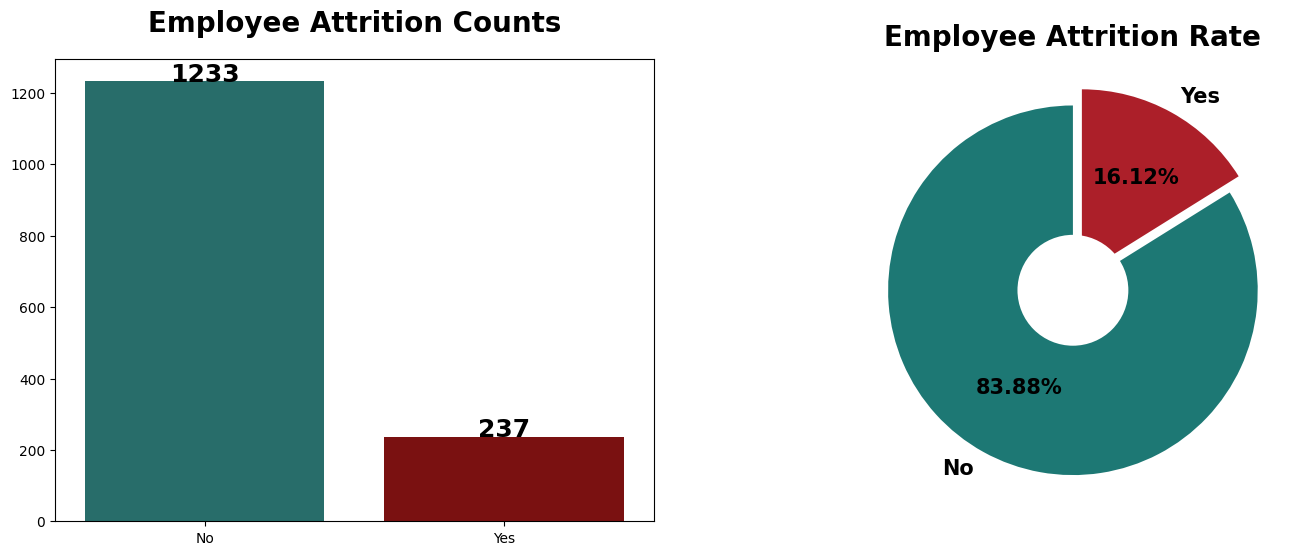

In [32]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)

for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)

center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()


**Now, we will analyse Attrition Rate with respect to different columns in our dataset.**

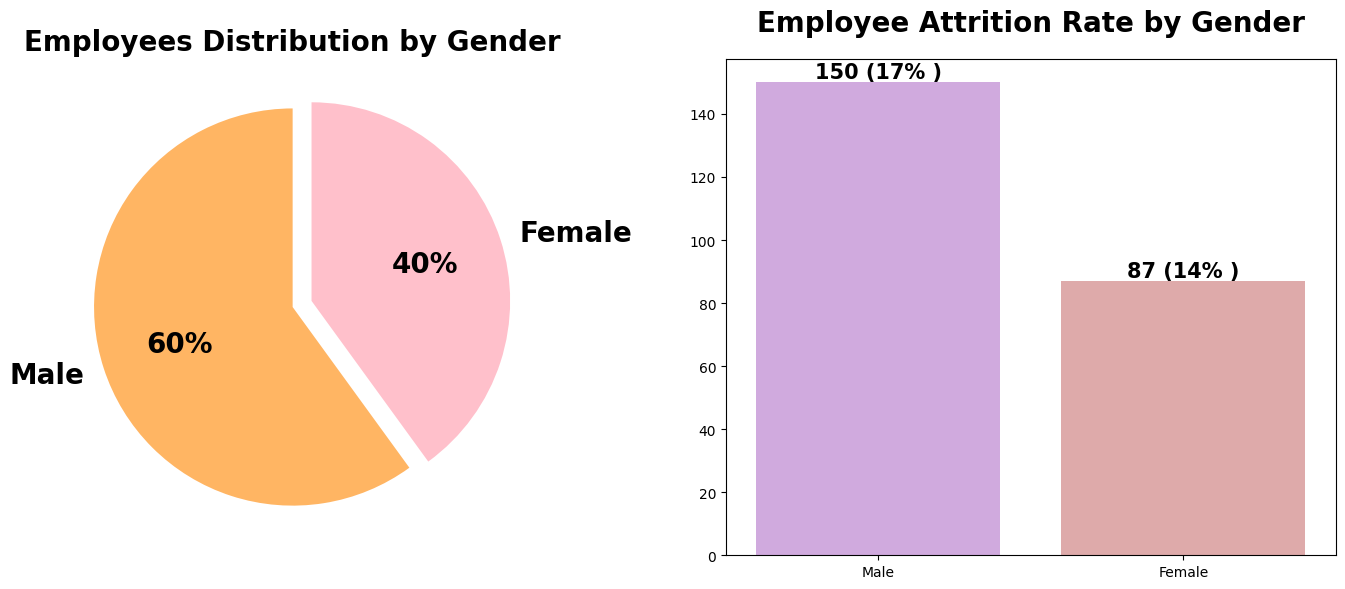

In [33]:
#Visualization to show Total Employees by Gender.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
gender_attrition = data["Gender"].value_counts()
plt.title("Employees Distribution by Gender",fontweight="black",size=20)
plt.pie(gender_attrition, autopct="%.0f%%",labels=gender_attrition.index,textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])

#Visualization to show Employee Attrition by Gender.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_1 = data["Gender"].value_counts()
value_2 = new_df["Gender"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

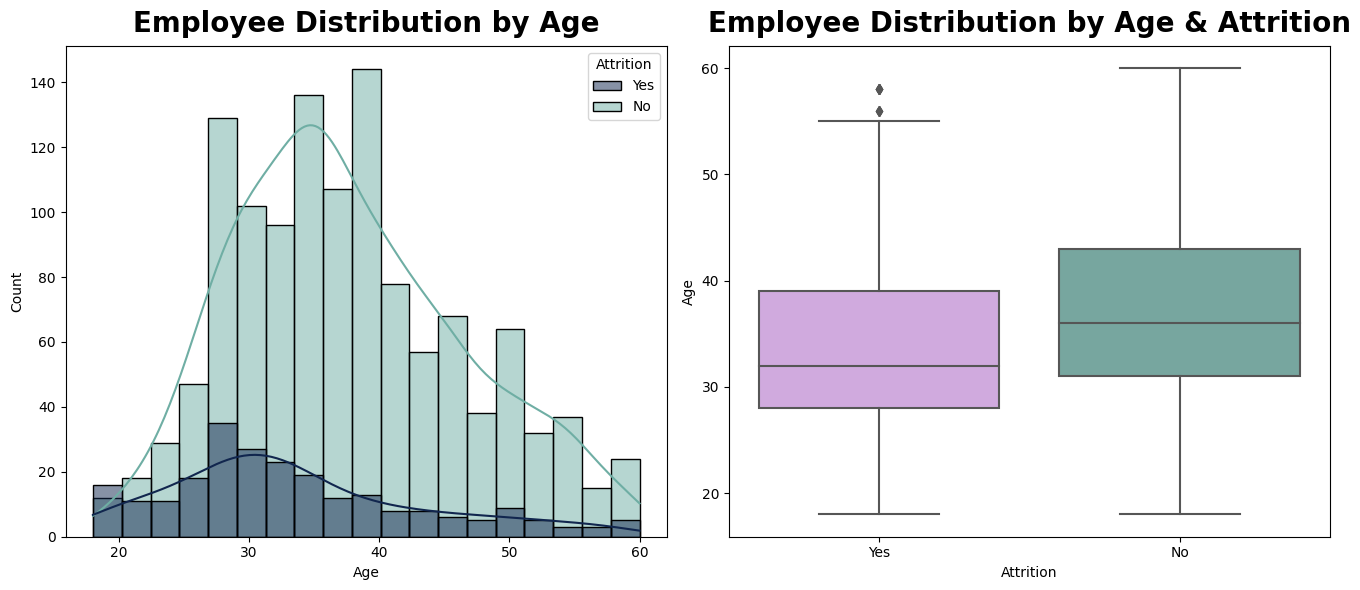

In [34]:
#Visualization to show Employee Distribution by Age.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=data,kde=True,palette=["#11264e","#6faea4"])
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)


#Visualization to show Employee Distribution by Age & Attrition.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="Age",data=data,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()


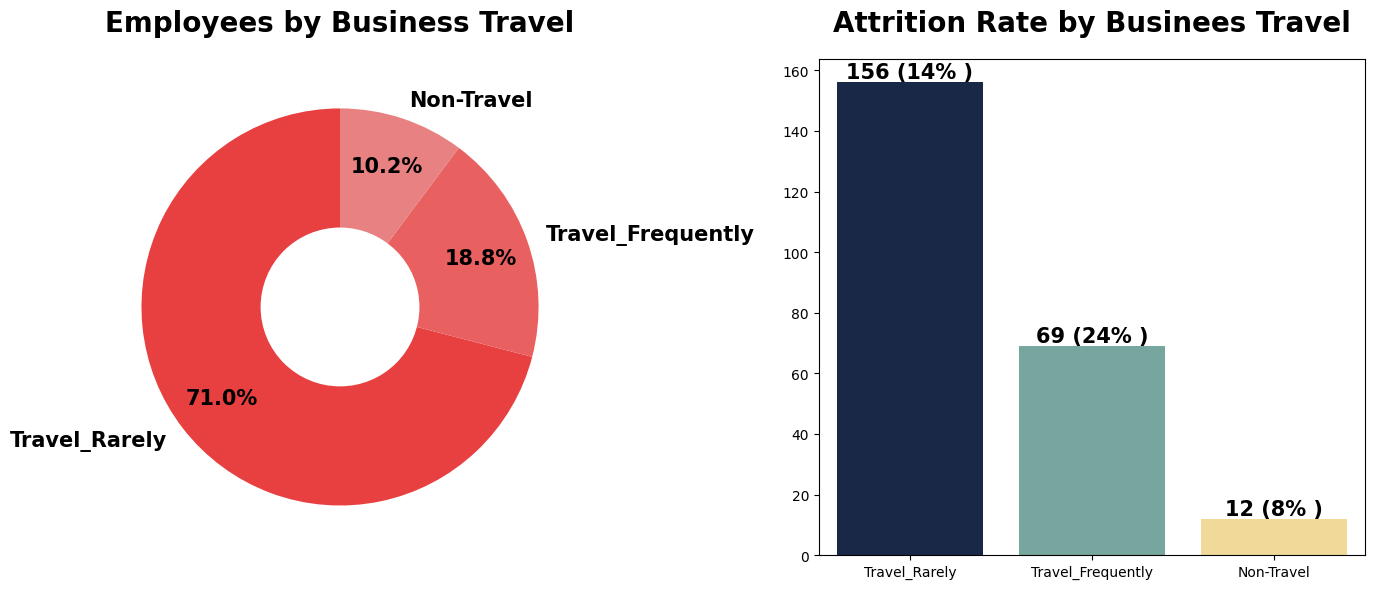

In [35]:
#Visualization to show Total Employees by Businees Travel.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by Businees Travel.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["BusinessTravel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Businees Travel",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

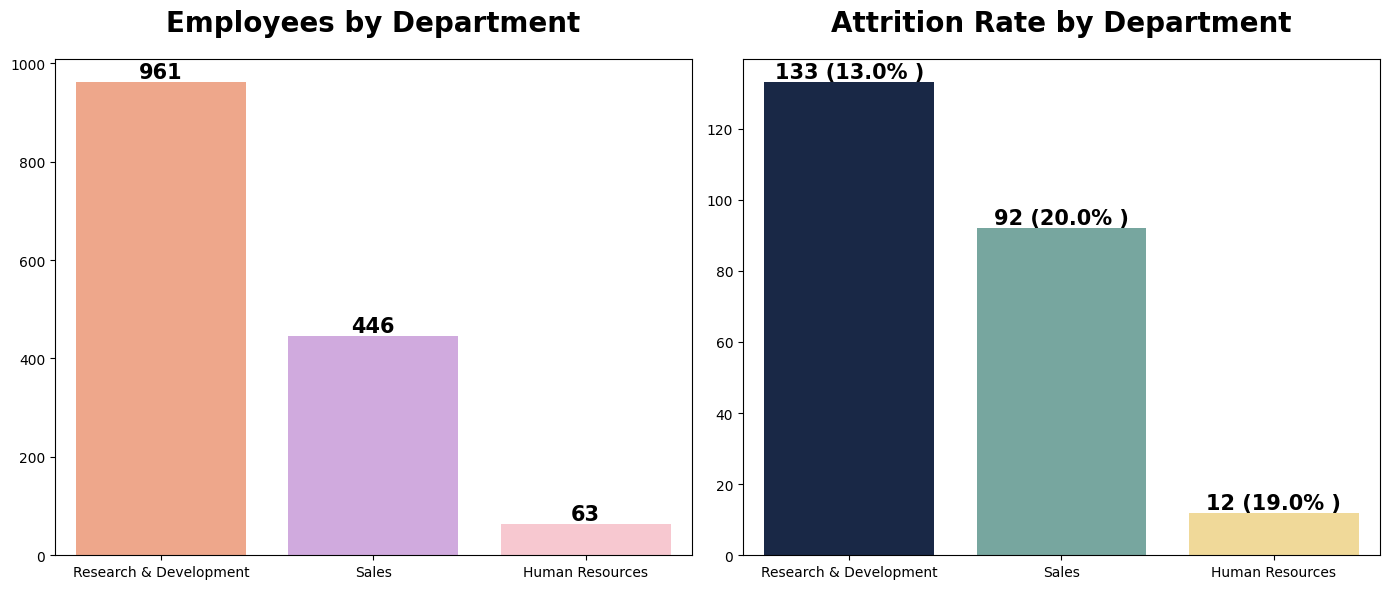

In [36]:
#Visualization to show Total Employees by Department.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["Department"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB"])
plt.title("Employees by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15,)

#Visualization to show Employee Attrition Rate by Department.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["Department"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Department",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [37]:
data["DailyRate"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0


In [38]:
# Define the bin edges for the groups
bin_edges = [0, 500, 1000, 1500]

# Define the labels for the groups
bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

# Cut the DailyRate column into groups
data['DailyRateGroup'] = pd.cut(data['DailyRate'], bins=bin_edges, labels=bin_labels)

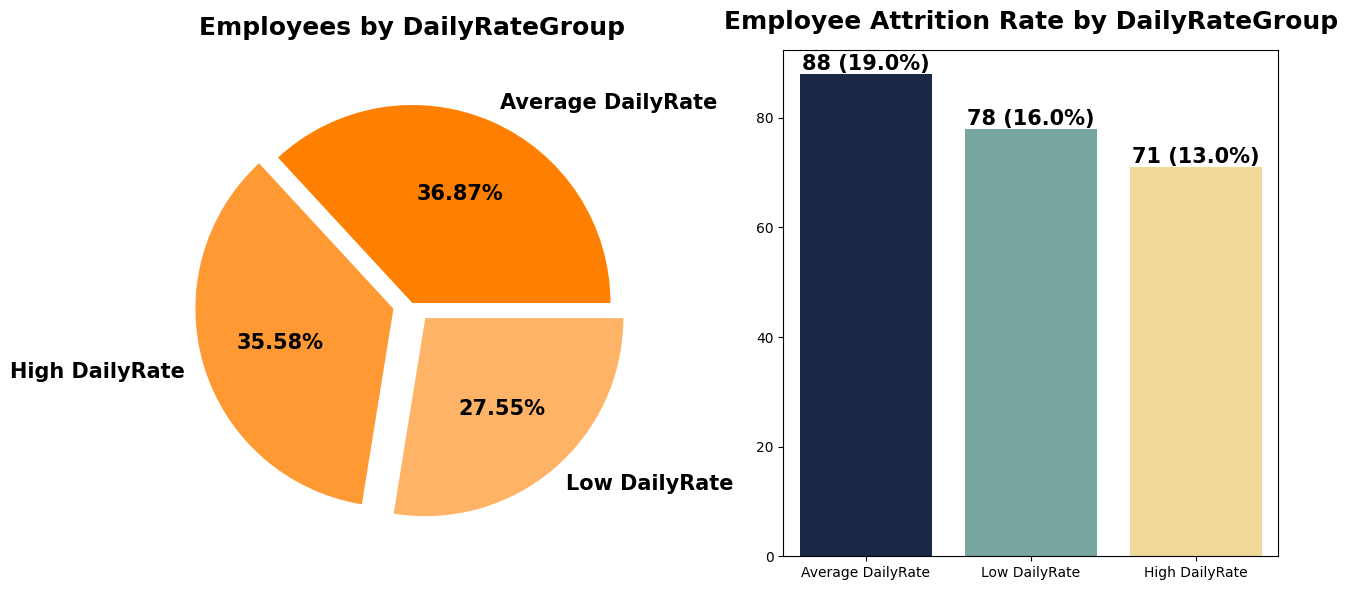

In [39]:
##Visualization to show Total Employees by DailyRateGroup.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = data["DailyRateGroup"].value_counts()
plt.pie(value_1.values, labels=value_1.index,autopct="%.2f%%",textprops={"fontweight":"black","size":15},
        explode=[0,0.1,0.1],colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'])
plt.title("Employees by DailyRateGroup",fontweight="black",pad=15,size=18)

#Visualization to show Attrition Rate by DailyRateGroup.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["DailyRateGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employee Attrition Rate by DailyRateGroup",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

In [41]:
print("Total Unique Values in Attribute is =>",data["DistanceFromHome"].nunique())

Total Unique Values in Attribute is => 29


In [42]:
data["DistanceFromHome"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [43]:
# Define the bin edges for the groups
bin_edges = [0,2,5,10,30]

# Define the labels for the groups
bin_labels = ['0-2 kms', '3-5 kms', '6-10 kms',"10+ kms"]

# Cuttinf the DistaanceFromHome column into groups
data['DistanceGroup'] = pd.cut(data['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

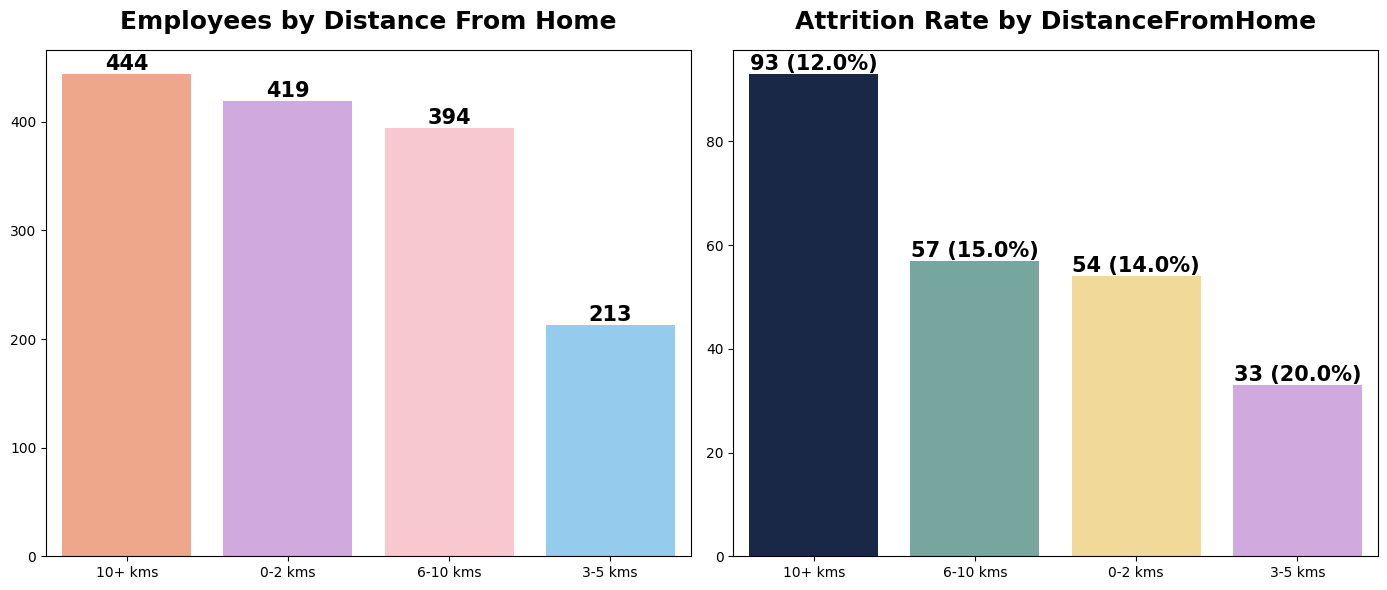

In [45]:
##Visualization to show Total Employees by DistnaceFromHome.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["DistanceGroup"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Distance From Home",fontweight="black",pad=15,size=18)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

#Visualization to show Attrition Rate by DistanceFromHome.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["DistanceGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by DistanceFromHome",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",fontweight="black",size=15)

plt.tight_layout()
plt.show()

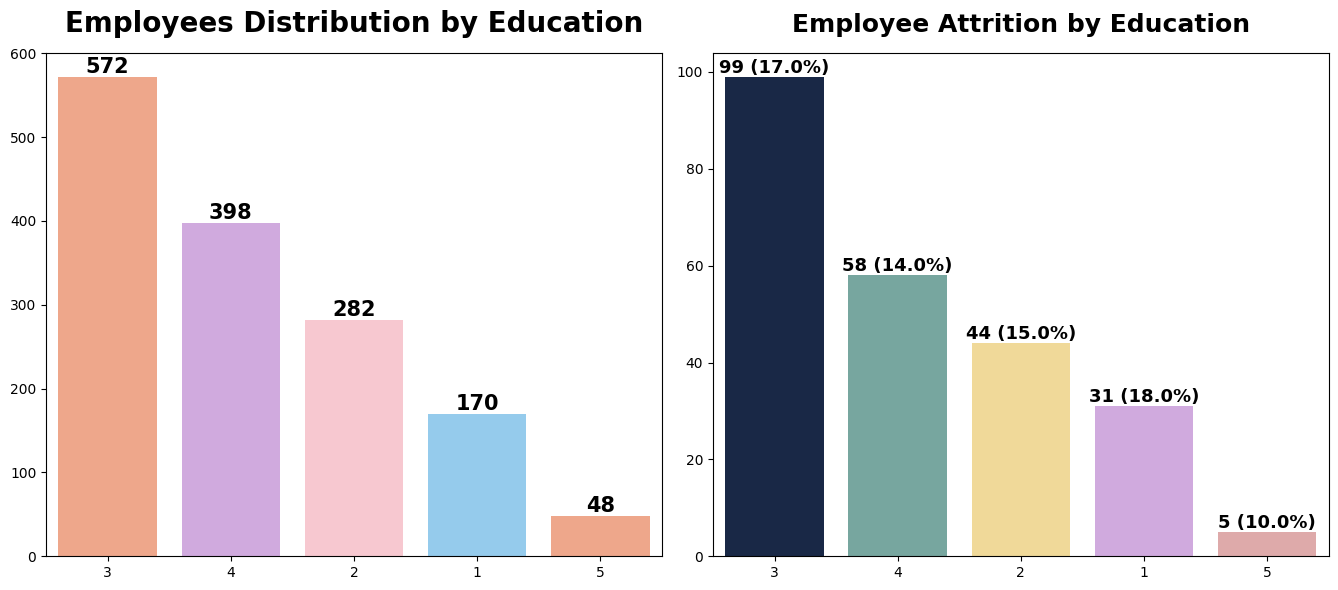

In [46]:
#Visualization to show Total Employees by Education.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
value_1 = data["Education"].value_counts()
sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees Distribution by Education",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

#Visualization to show Employee Attrition by Education.
plt.subplot(1,2,2)
value_2 = new_df["Education"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition by Education",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.tight_layout()
plt.show()

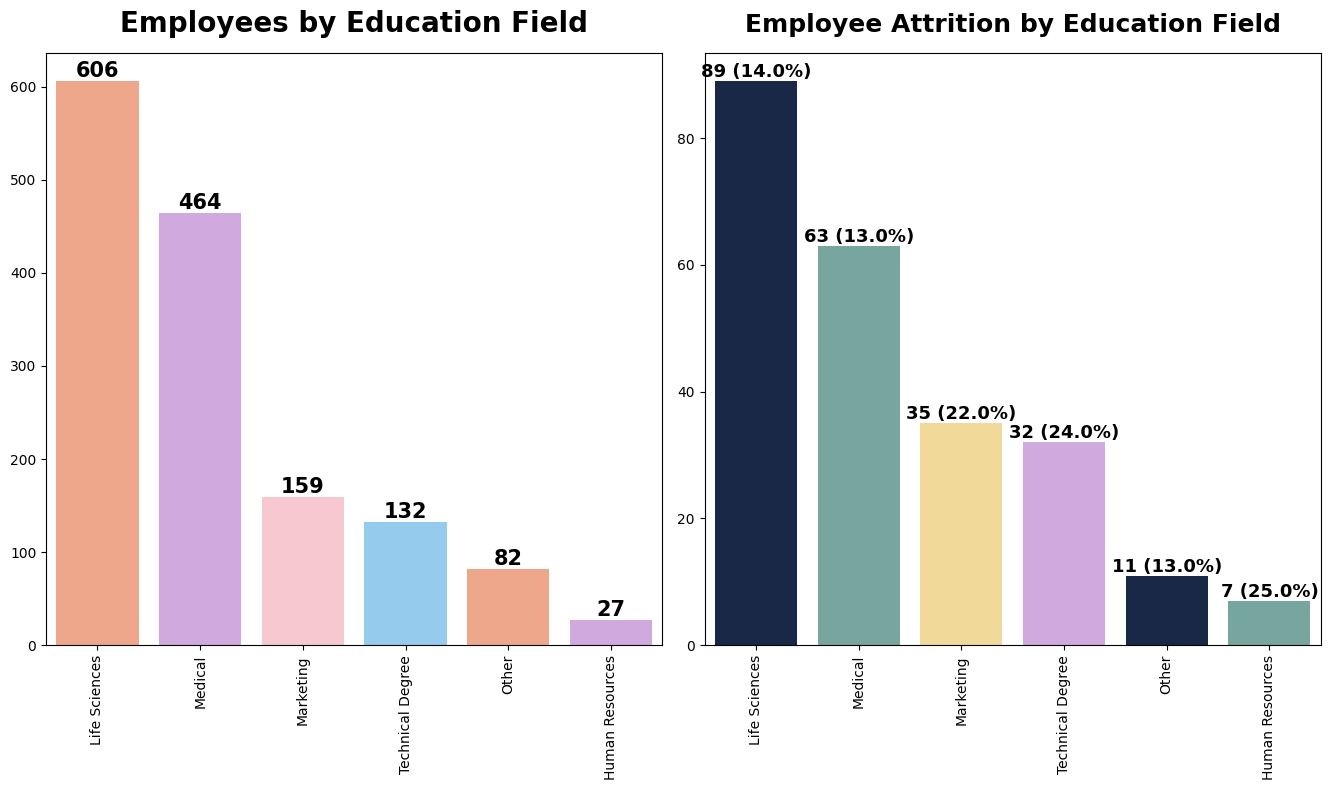

In [48]:
#Visualization to show Total Employees by Education Field.
plt.figure(figsize=(13.5,8))
plt.subplot(1,2,1)
value_1 = data["EducationField"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Education Field",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
plt.xticks(rotation=90)


#Visualization to show Employee Attrition by Education Field.
plt.subplot(1,2,2)
value_2 = new_df["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Employee Attrition by Education Field",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

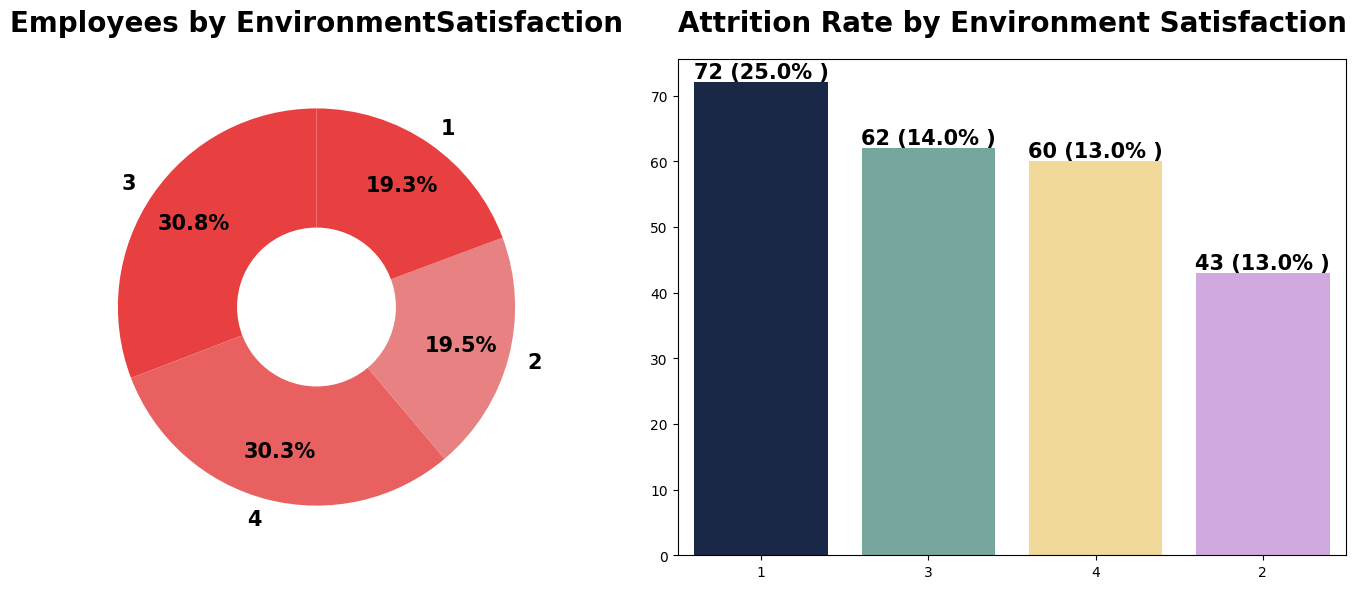

In [49]:
#Visualization to show Total Employees by EnvironmentSatisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["EnvironmentSatisfaction"].value_counts()
plt.title("Employees by EnvironmentSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by EnvironmentSatisfaction.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["EnvironmentSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Environment Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

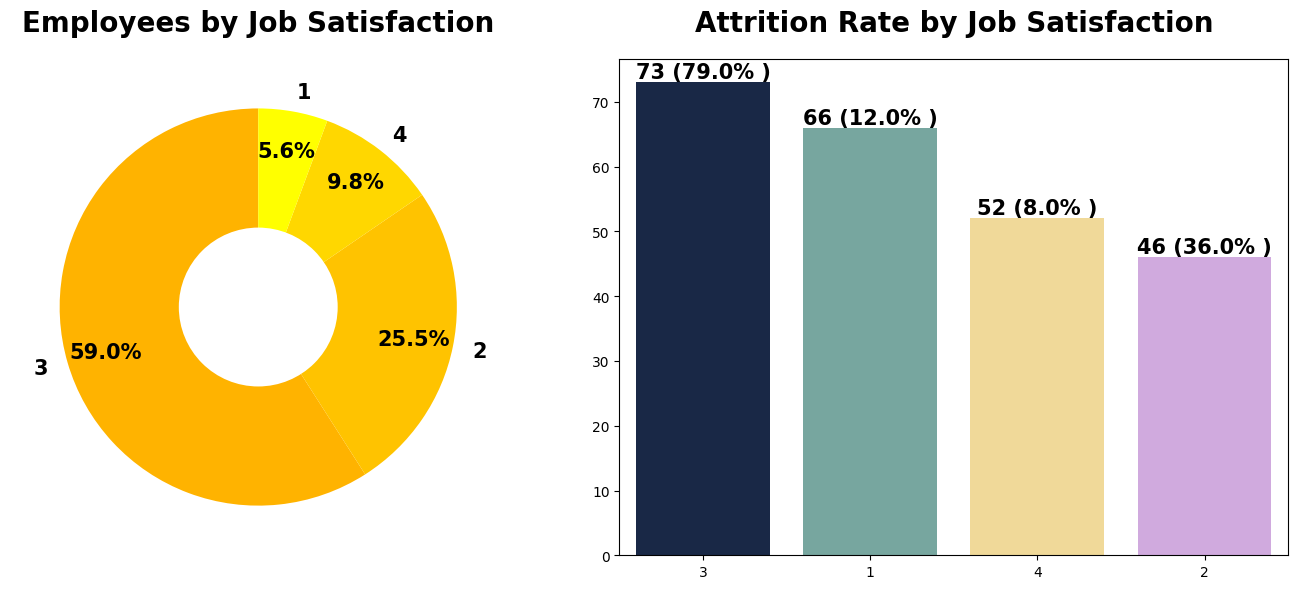

In [64]:
#Visualization to show Total Employees by Job Satisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["JobInvolvement"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by Job Satisfaction.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["JobSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

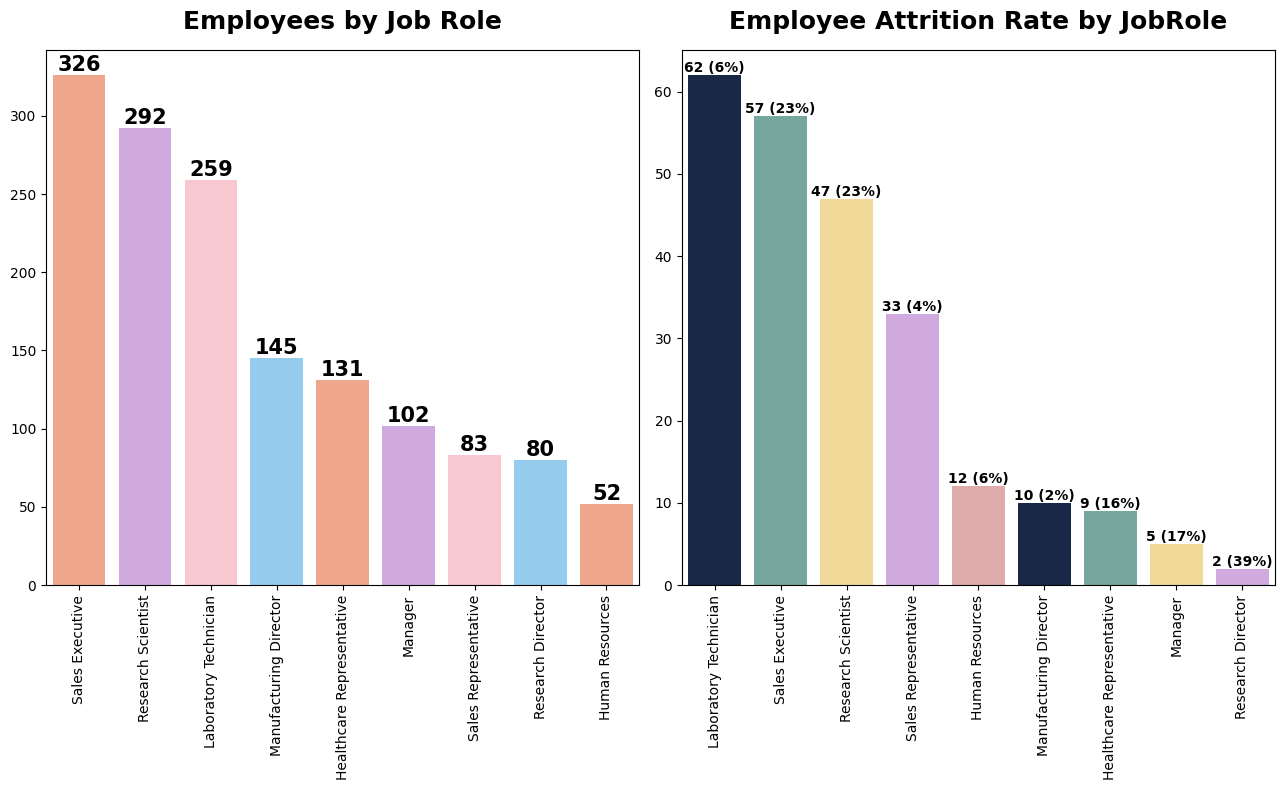

In [51]:
##Visualization to show Total Employees by JobRole.
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
value_1 = data["JobRole"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Job Role",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)

#Visualization to show Attrition Rate by JobRole.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=10)

plt.tight_layout()
plt.show()


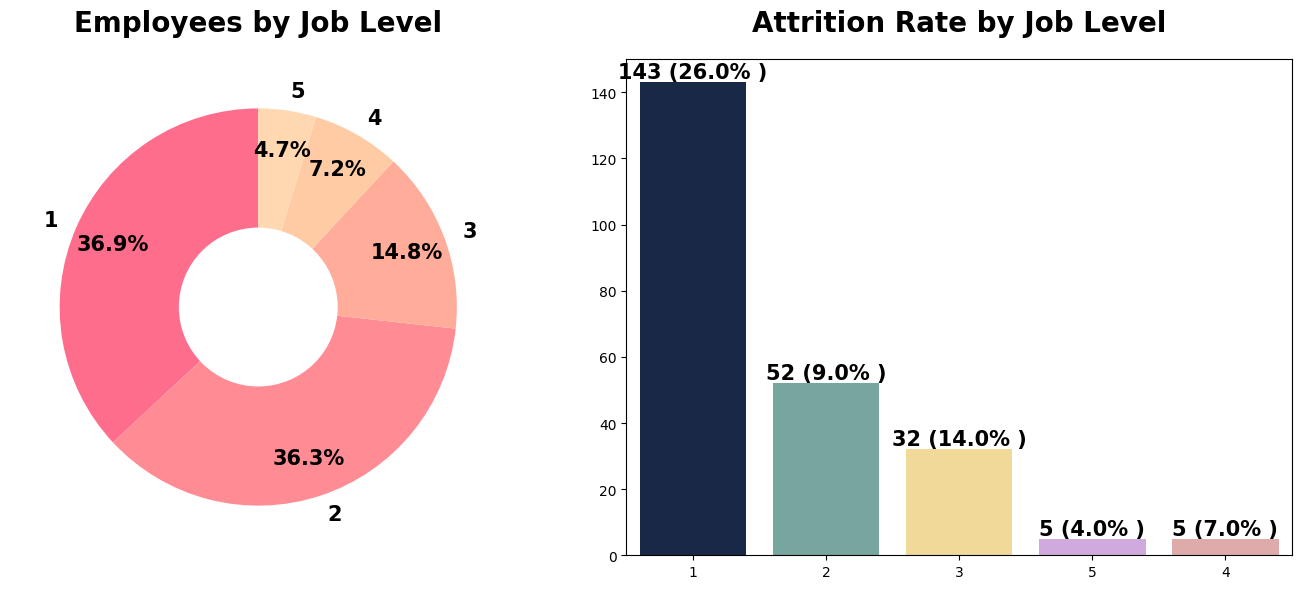

In [52]:
#Visualization to show Total Employees by Job Level.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["JobLevel"].value_counts()
plt.title("Employees by Job Level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4',"#FFD8B1"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by JobLevel.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["JobLevel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


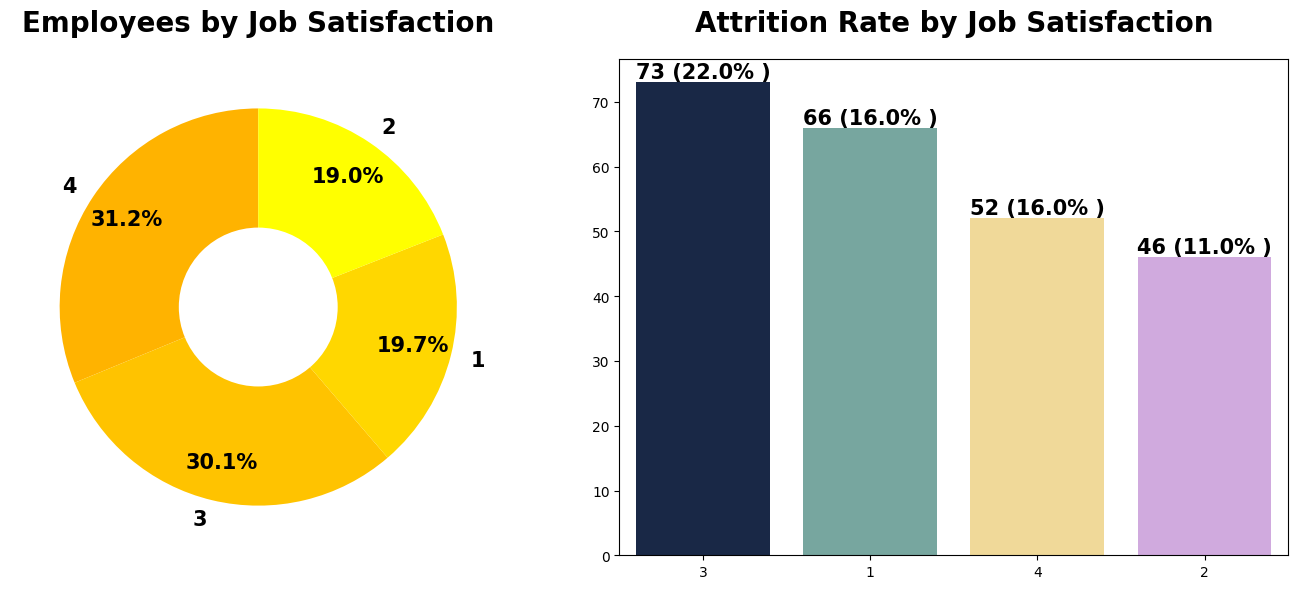

In [53]:
#Visualization to show Total Employees by Job Satisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["JobSatisfaction"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by Job Satisfaction.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["JobSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


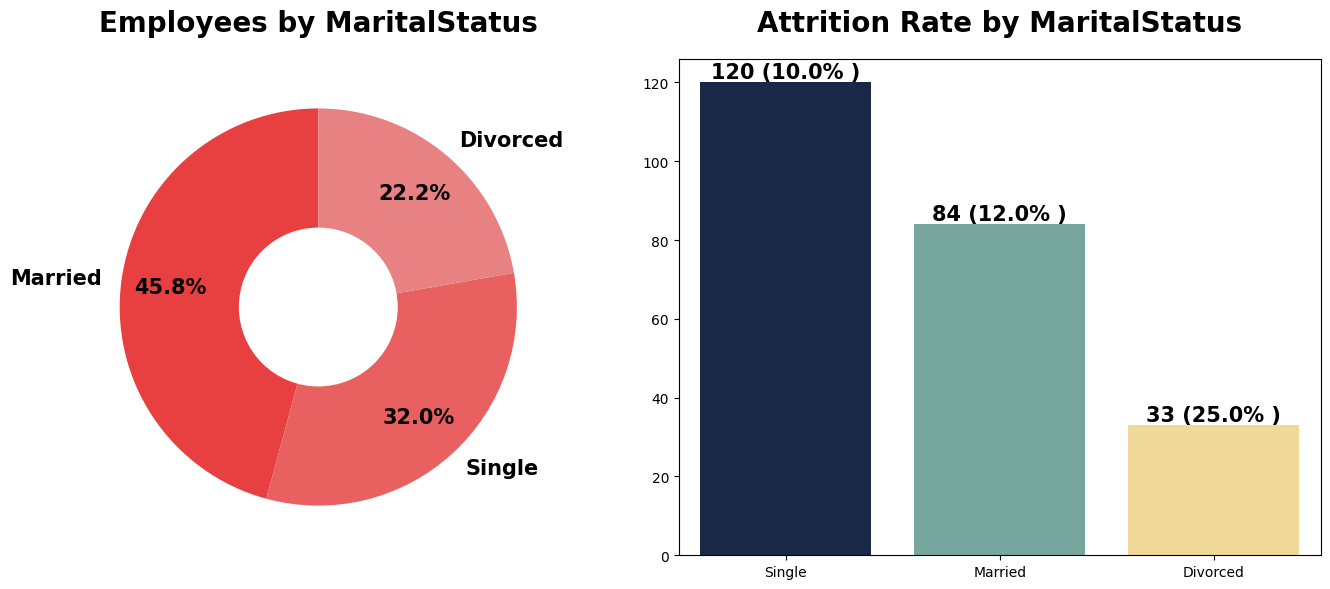

In [54]:
#Visualization to show Total Employees by MaritalStatus.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["MaritalStatus"].value_counts()
plt.title("Employees by MaritalStatus", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by MaritalStatus.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["MaritalStatus"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by MaritalStatus",
          fontweight="black",
          size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

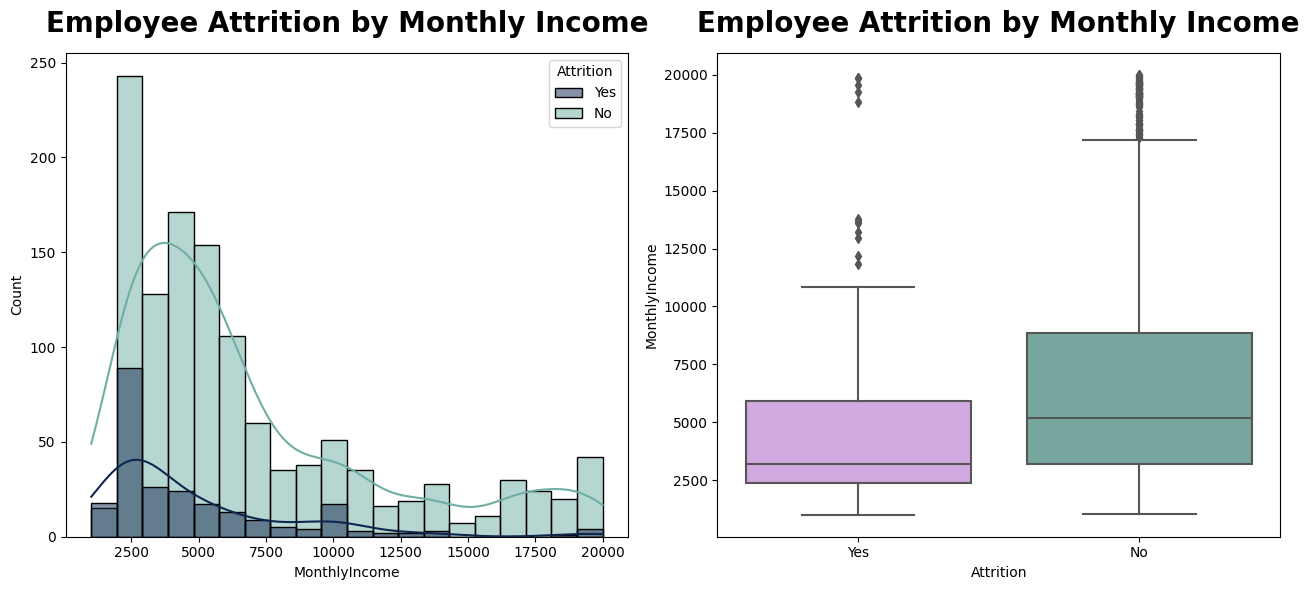

In [55]:
#Visualization to show Employee Distribution by MonthlyIncome.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=data,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)

#Visualization to show Employee Attrition by Monthly Income.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=data,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

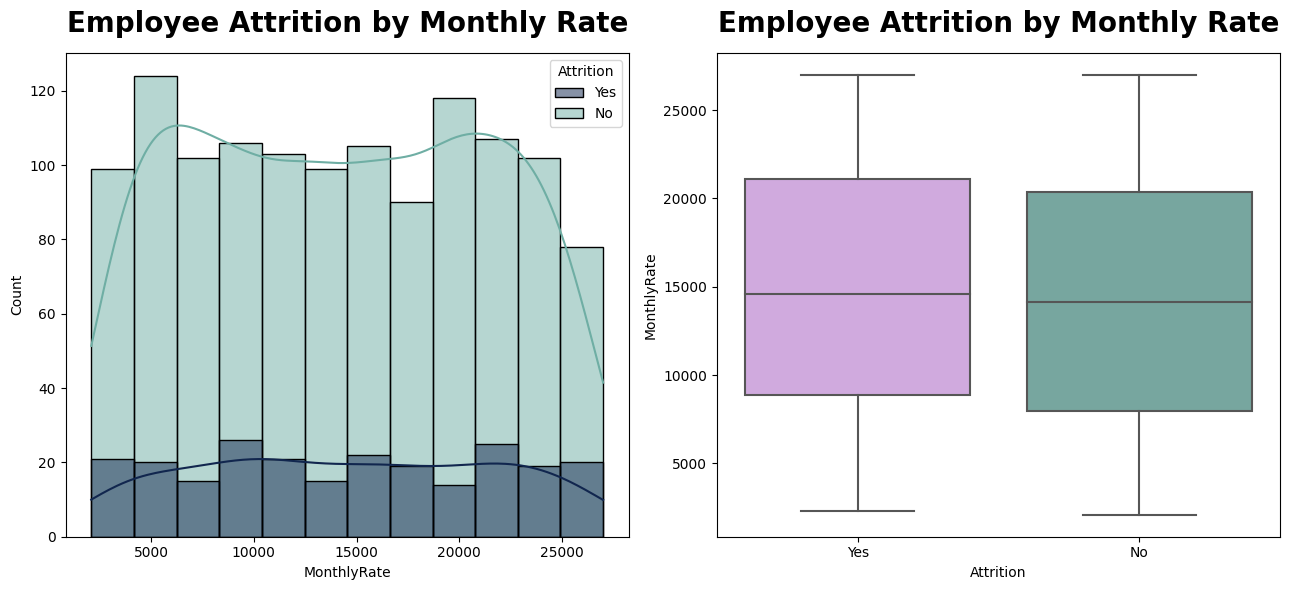

In [56]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyRate", hue="Attrition", data=data,kde=True, palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Rate",fontweight="black",size=20,pad=15)

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyRate",data=data,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Rate",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

In [57]:
data["NumCompaniesWorked"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [58]:
# Define the bin edges for the groups
bin_edges = [0, 1, 3, 5, 10]

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]

# Cut the DailyRate column into groups
data["NumCompaniesWorkedGroup"] = pd.cut(data['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

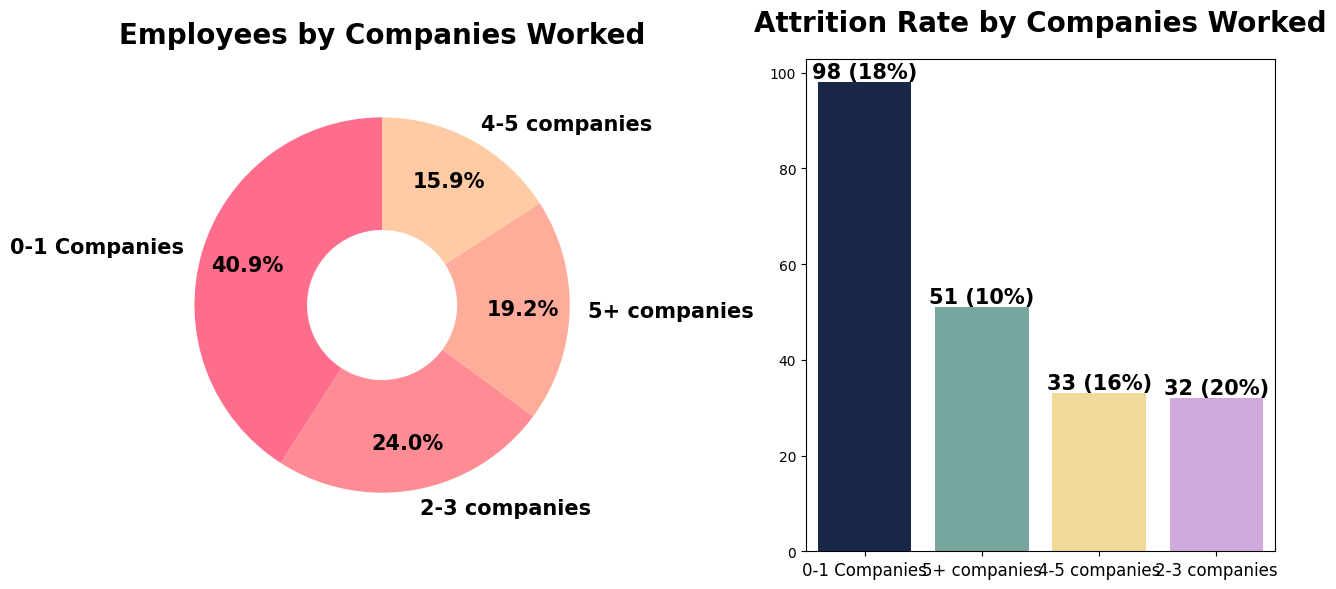

In [59]:
#Visualization to show Total Employees by NumCompaniesWorked.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = data["NumCompaniesWorkedGroup"].value_counts()
plt.title("Employees by Companies Worked", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by NumCompaniesWorked.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["NumCompaniesWorkedGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Companies Worked",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=12)
plt.tight_layout()
plt.show()


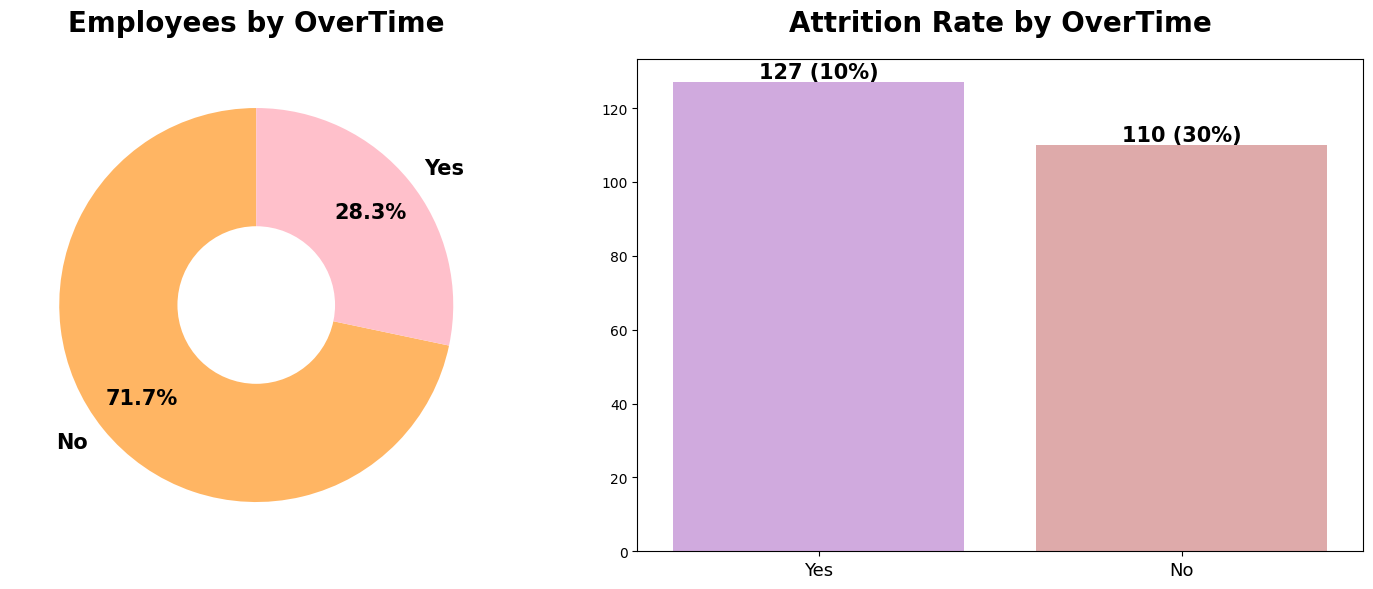

In [61]:
#Visualization to show Total Employees by OverTime.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = data["OverTime"].value_counts()
plt.title("Employees by OverTime", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by OverTime.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["OverTime"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by OverTime",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=13)
plt.tight_layout()
plt.show()

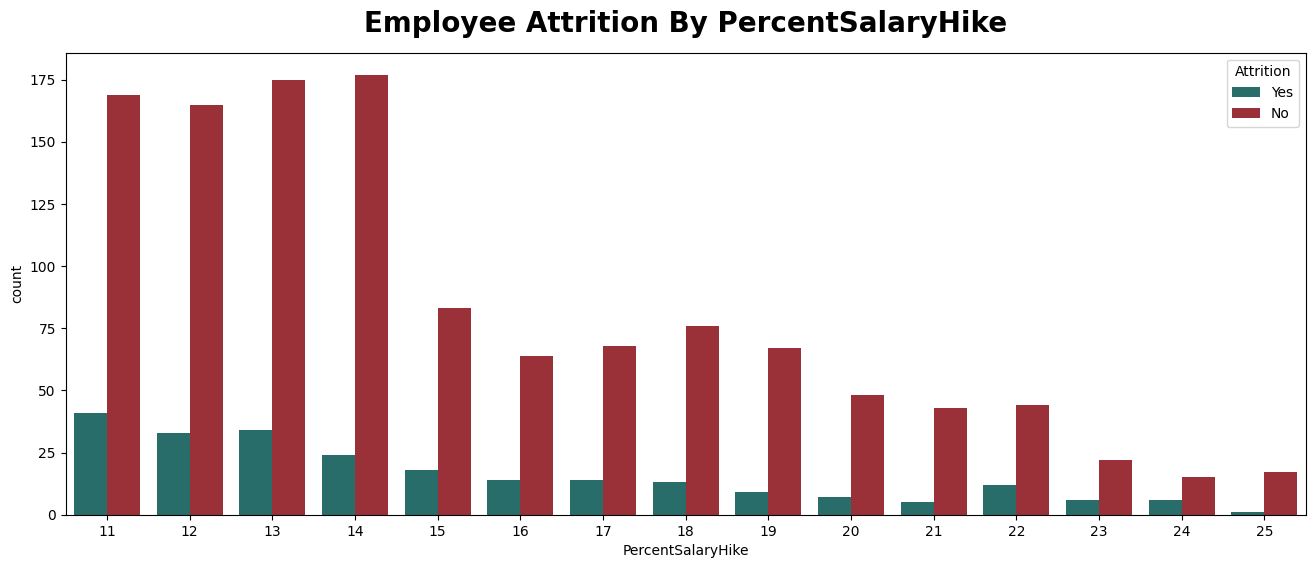

In [62]:
#Visualization to show Employee Distribution by Percentage Salary Hike.
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=data, palette=["#1d7874","#AC1F29"])
plt.title("Employee Attrition By PercentSalaryHike",fontweight="black",size=20,pad=15)
plt.show()

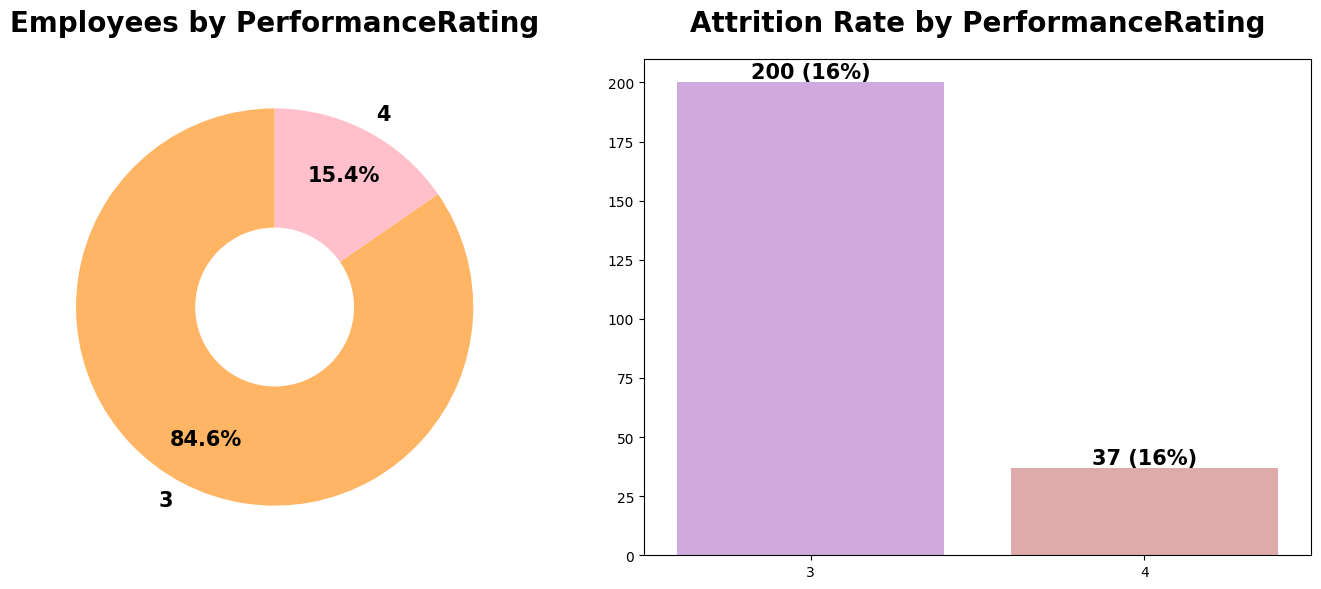

In [63]:
#Visualization to show Total Employees by PerformanceRating.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["PerformanceRating"].value_counts()
plt.title("Employees by PerformanceRating", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by PerformanceRating.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["PerformanceRating"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by PerformanceRating",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

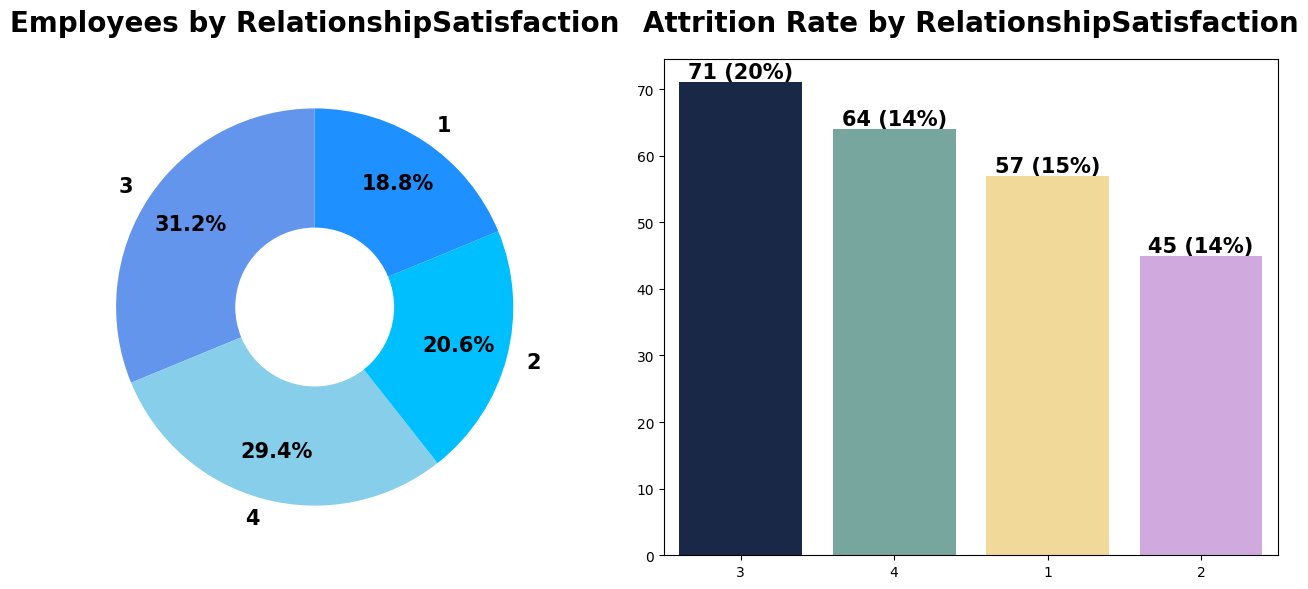

In [65]:
#Visualization to show Total Employees by RelationshipSatisfaction.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = data["RelationshipSatisfaction"].value_counts()
plt.title("Employees by RelationshipSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by RelationshipSatisfaction.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["RelationshipSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by RelationshipSatisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

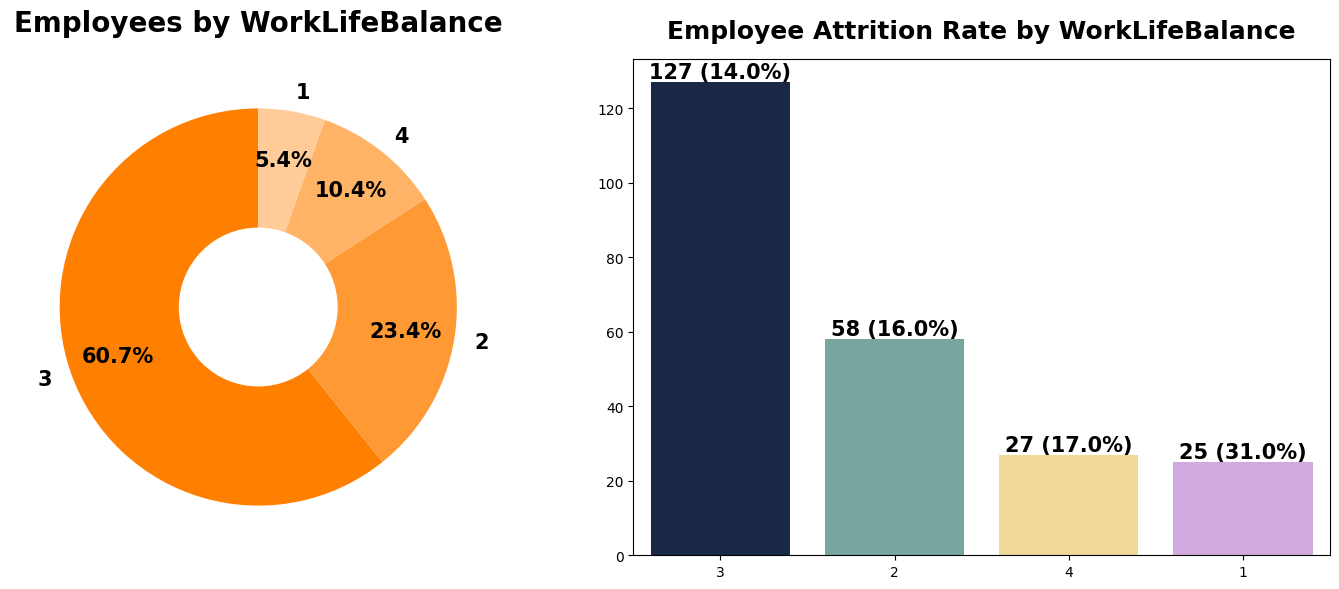

In [66]:
##Visualization to show Total Employees by WorkLifeBalance.
plt.figure(figsize=(14.5,6))
plt.subplot(1,2,1)
value_1 = data["WorkLifeBalance"].value_counts()
plt.title("Employees by WorkLifeBalance", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by WorkLifeBalance.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["WorkLifeBalance"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by WorkLifeBalance",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=15)
plt.tight_layout()
plt.show()

In [68]:
# Define the bin edges for the groups
bin_edges = [0, 5, 10, 20, 50]

# Define the labels for the groups
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]

# Cut the DailyRate column into groups
data["TotalWorkingYearsGroup"] = pd.cut(data['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

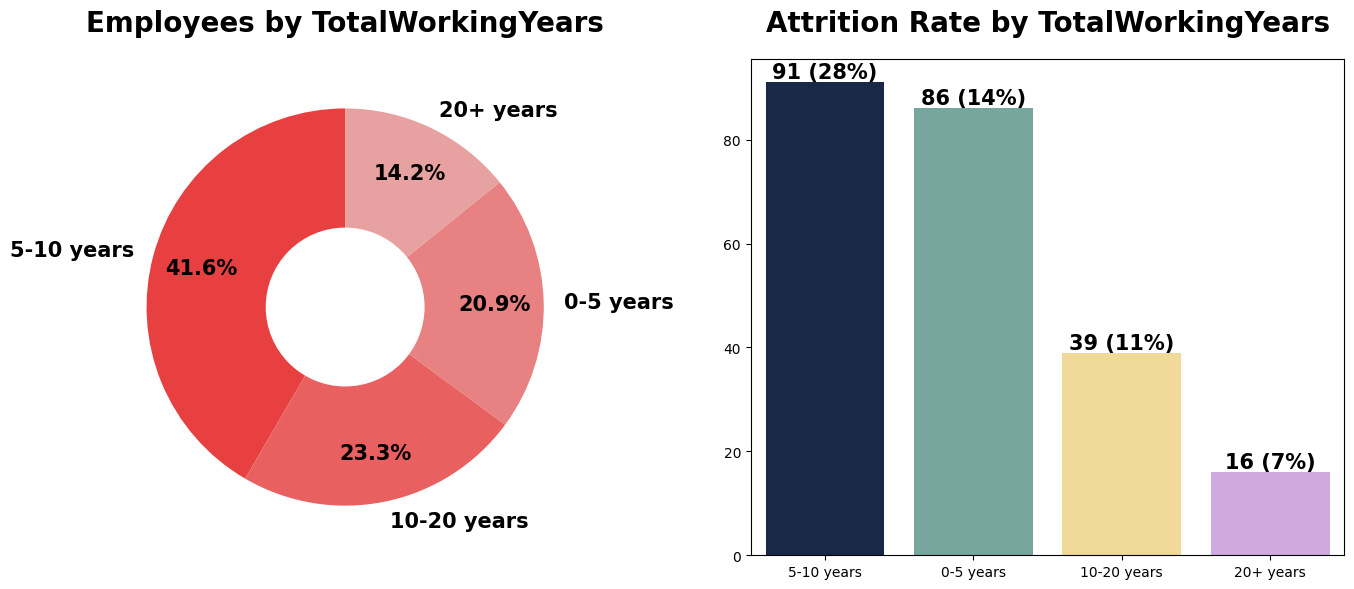

In [69]:
#Visualization to show Total Employees by TotalWorkingYearsGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)


#Visualization to show Attrition Rate by TotalWorkingYearsGroup.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by TotalWorkingYears",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [70]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
data["YearsAtCompanyGroup"] = pd.cut(data['YearsAtCompany'], bins=bin_edges, labels=bin_labels)

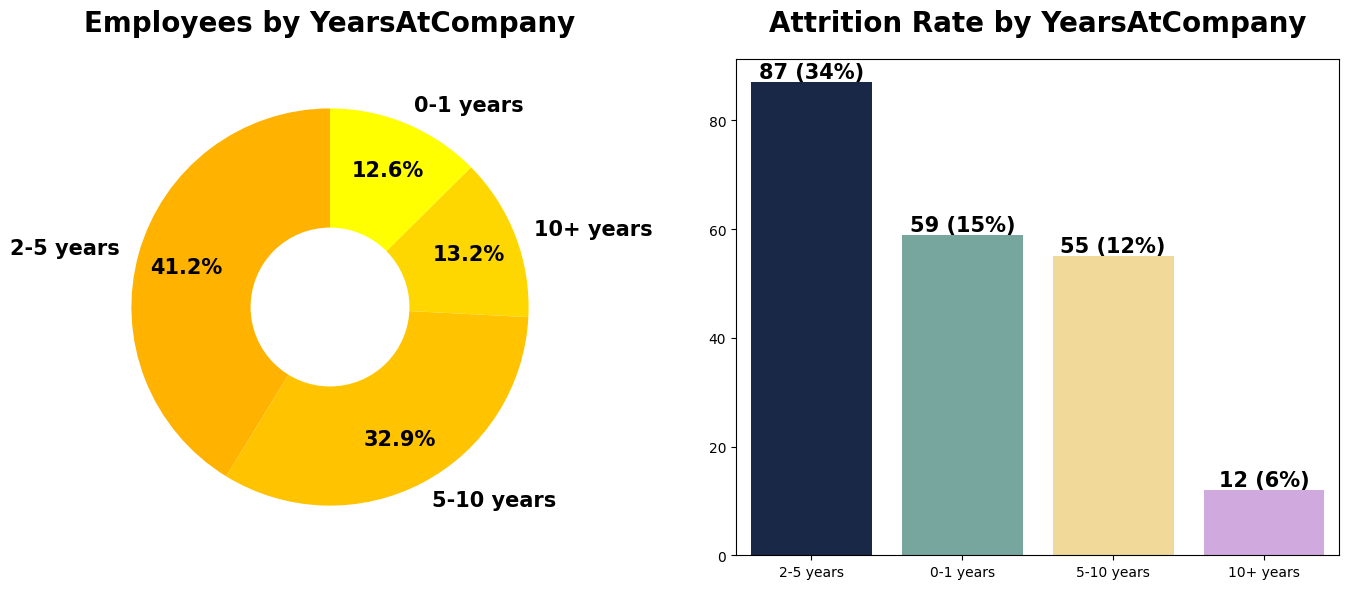

In [71]:
#Visualization to show Total Employees by YearsAtCompanyGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["YearsAtCompanyGroup"].value_counts()
plt.title("Employees by YearsAtCompany", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsAtCompanyGroup.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["YearsAtCompanyGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsAtCompany",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()


In [72]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
data["YearsInCurrentRoleGroup"] = pd.cut(data['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)

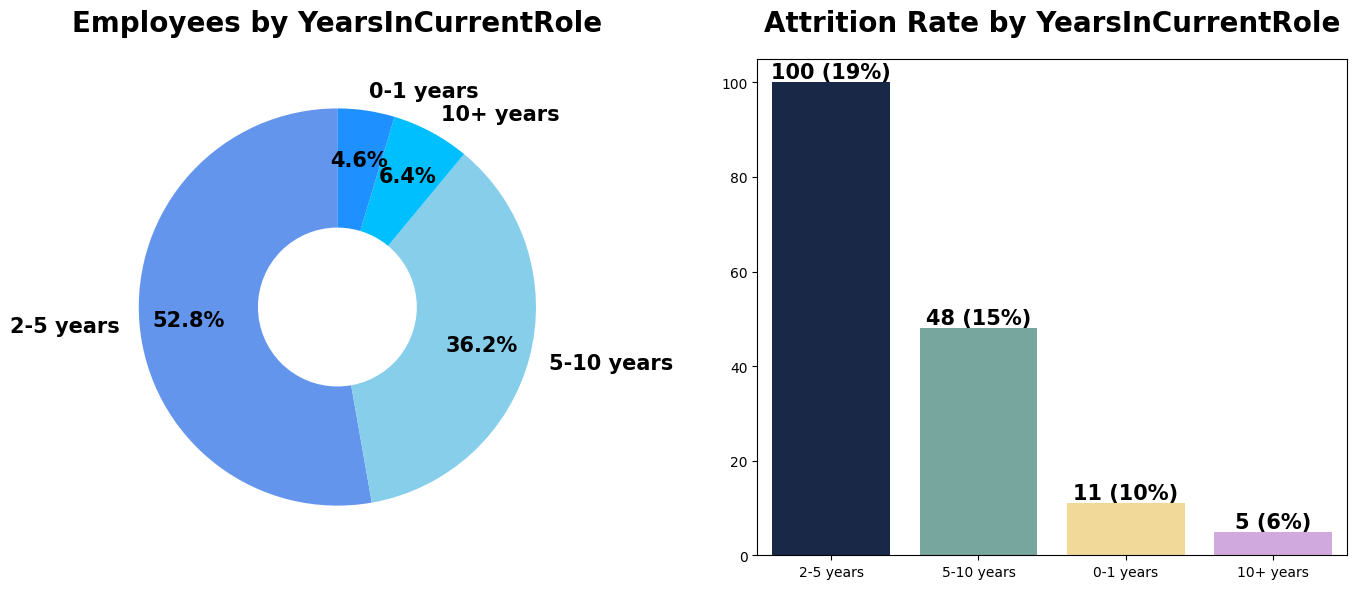

In [73]:
#Visualization to show Total Employees by YearsInCurrentRoleGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["YearsInCurrentRoleGroup"].value_counts()
plt.title("Employees by YearsInCurrentRole", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15,"color":"black"})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsInCurrentRoleGroup.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["YearsInCurrentRoleGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette= ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsInCurrentRole",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [74]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
data["YearsSinceLastPromotionGroup"] = pd.cut(data['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)

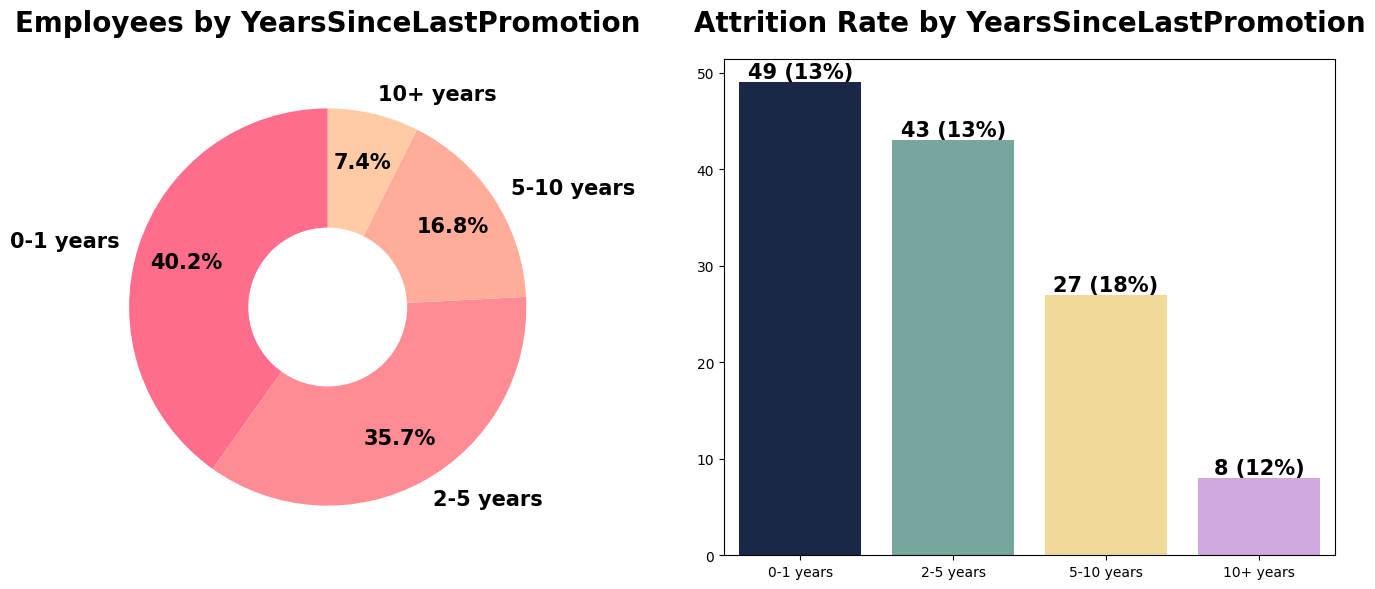

In [75]:
#Visualization to show Total Employees by YearsSinceLastPromotionGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["YearsSinceLastPromotionGroup"].value_counts()
plt.title("Employees by YearsSinceLastPromotion", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by YearsSinceLastPromotionGroup.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["YearsSinceLastPromotionGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

plt.title("Attrition Rate by YearsSinceLastPromotion",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [76]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
data["YearsWithCurrManagerGroup"] = pd.cut(data['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)

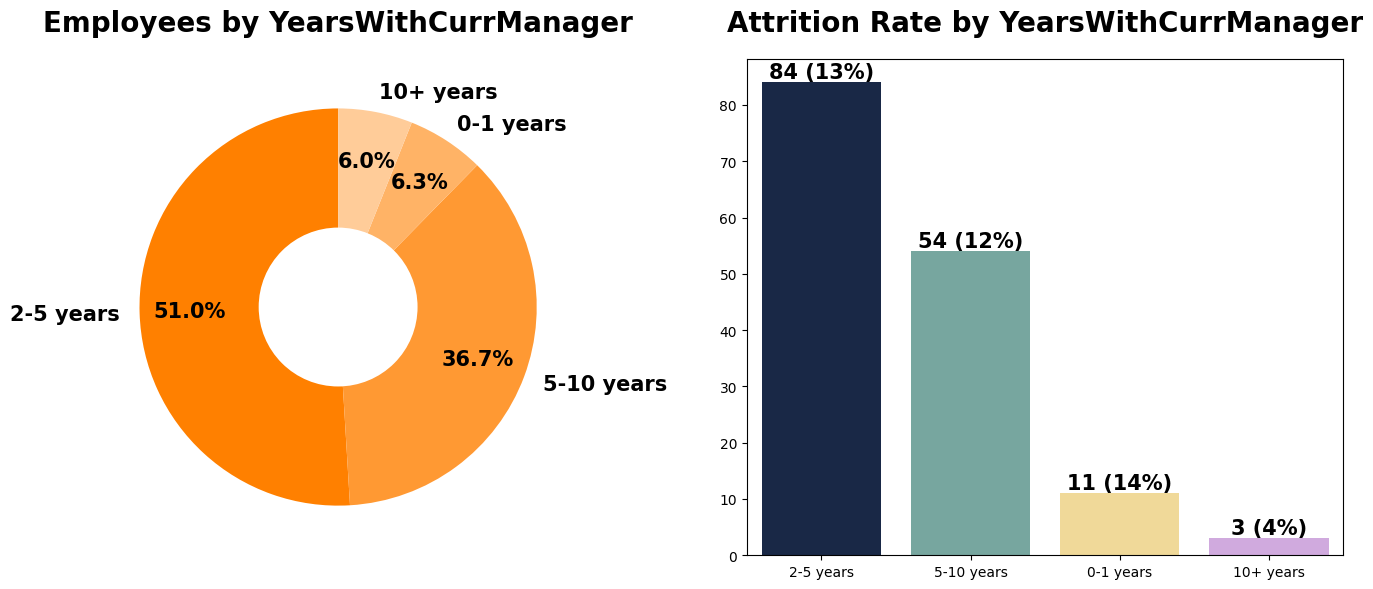

In [77]:
#Visualization to show Total Employees by YearsWithCurrManagerGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = data["YearsWithCurrManagerGroup"].value_counts()
plt.title("Employees by YearsWithCurrManager", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)


#Visualization to show Attrition Rate by YearsWithCurrManagerGroup.
plt.subplot(1,2,2)
new_df = data[data["Attrition"]=="Yes"]
value_2 = new_df["YearsWithCurrManagerGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsWithCurrManager",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [89]:
data1=pd.read_csv('IBM_HR_Employee_Attrition.csv')

In [90]:
data2=data1.copy()
label=LabelEncoder()
for x in data2.select_dtypes(include='object').columns:
    data2[x]=label.fit_transform(data2[x])
data2.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [91]:
data2.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


### **Now we will build some ML models to predict Attrition of an employee.**

In [92]:
X=data2.drop('Attrition',axis=1)
y=data2['Attrition']
key=X.keys()
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [93]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [94]:
## We use Synthetic Minority Over-sampling Technique (SMOTE) to balance our dataset by generating synthetic samples for the minority class.

#After running the below line of code, X and y will be modified to include the synthetic samples generated by SMOTE, resulting in a balanced dataset. This can be particularly useful when you're training a machine learning model and want to avoid bias towards the majority class.

## Here's a brief summary of what SMOTE does:

# It identifies the minority class samples that are most at risk of being misclassified.
# For each of these minority samples, it selects one or more of its nearest neighbors.
# It generates synthetic samples along the line segments that connect the minority sample and its selected neighbors.
# The number of synthetic samples generated is determined by the extent to which we want to balance the dataset.


smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [95]:
#Now we split our data into training and testing data for our models:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1972, 34)
X_test shape is  (494, 34)
y_train shape is  (1972,)
y_test shape is  (494,)


### **Random Forest Classifier**

The Random Forest Classifier is a popular machine learning algorithm used for classification tasks. It belongs to the ensemble learning family, where it combines the predictions of multiple decision trees to make more accurate and robust classifications.

In [125]:
random_pip=Pipeline([
                    ('min_max',MinMaxScaler()),
                    ('model',RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=10,random_state=44))
                    ])
random_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=44))])

In [126]:
print('RandomForestClassifierModel Train Score is : ' ,random_pip.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' ,random_pip.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.994421906693712
RandomForestClassifierModel Test Score is :  0.8967611336032388


In [128]:
y_pred=random_pip.predict(X_test)

In [129]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :')
print(ClassificationReport)

Classification Report is :
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       256
           1       0.89      0.89      0.89       238

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [132]:
score=np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring='accuracy'))
print('Accuracy score for Random Classifier is:', score)

Accuracy score for Random Classifier is: 0.903141766235476


### **Logistic Regression**


Logistic Regression is a widely used statistical method and machine learning algorithm for binary and multi-class classification tasks. It is particularly useful when you want to model the probability of a binary outcome (0 or 1) based on one or more predictor variables.

In [167]:
log_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',LogisticRegression(penalty='l2',solver='sag',C=2.0,random_state=44))
                    ])
log_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2.0, random_state=44, solver='sag'))])

In [168]:
print('LogisticRegressionModel Train Score is : ' , log_pip.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' ,log_pip.score(X_test, y_test))

LogisticRegressionModel Train Score is :  0.834685598377282
LogisticRegressionModel Test Score is :  0.8421052631578947


In [169]:
y_pred=log_pip.predict(X_test)

In [170]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :')
print(ClassificationReport)

Classification Report is :
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       256
           1       0.83      0.85      0.84       238

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



In [171]:
score=np.mean(cross_val_score(LogisticRegression(),X,y,cv=10,scoring='accuracy'))
print('Accuracy score for Logistic Regression is:', score)

Accuracy score for Logistic Regression is: 0.643960040814983


### **Stochastic Gradient Descent (SGD) Classifier**

The Stochastic Gradient Descent (SGD) Classifier is a machine learning algorithm used for both binary and multiclass classification. It's a variant of gradient descent that updates model parameters based on a small, randomly selected subset of training data at each iteration.

In [172]:
sgd_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',SGDClassifier(penalty='l2',learning_rate='optimal',random_state=44))
                    ])
sgd_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model', SGDClassifier(random_state=44))])

In [173]:
print('SGDClassifierModel Train Score is : ' , sgd_pip.score(X_train, y_train))
print('SGDClassifierModel Test Score is : ' ,sgd_pip.score(X_test, y_test))

SGDClassifierModel Train Score is :  0.8154158215010142
SGDClassifierModel Test Score is :  0.8097165991902834


In [174]:
y_pred=sgd_pip.predict(X_test)

In [175]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :')
print(ClassificationReport)

Classification Report is :
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       256
           1       0.91      0.67      0.77       238

    accuracy                           0.81       494
   macro avg       0.83      0.80      0.80       494
weighted avg       0.83      0.81      0.81       494



In [176]:
score=np.mean(cross_val_score(SGDClassifier(),X,y,cv=10,scoring='accuracy'))
print('Accuracy score for SGD Classifier is:', score)

Accuracy score for SGD Classifier is: 0.5048731114841514


### **Support Vector Classifier (SVC)**


Support Vector Machines (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks.
The Support Vector Classifier (SVC) is an SVM variant specifically designed for classification tasks.

In [177]:
svc_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',SVC(kernel= 'rbf',max_iter=100,C=2.0,gamma='auto'))
                    ])
svc_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model', SVC(C=2.0, gamma='auto', max_iter=100))])

In [178]:
print('SVCModel Train Score is : ' ,svc_pip.score(X_train, y_train))
print('SVCModel Test Score is : ' , svc_pip.score(X_test, y_test))

SVCModel Train Score is :  0.6247464503042597
SVCModel Test Score is :  0.6255060728744939


In [179]:
y_pred=svc_pip.predict(X_test)

In [180]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :')
print(ClassificationReport)

Classification Report is :
              precision    recall  f1-score   support

           0       0.84      0.34      0.49       256
           1       0.57      0.93      0.70       238

    accuracy                           0.63       494
   macro avg       0.70      0.64      0.60       494
weighted avg       0.71      0.63      0.59       494



In [181]:
score=np.mean(cross_val_score(SVC(),X,y,cv=10,scoring='accuracy'))
print('Accuracy score for SVC Classifier is:', score)

Accuracy score for SVC Classifier is: 0.6013906718014548


### **K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN) is a simple but powerful supervised machine learning algorithm used for both classification and regression tasks. It's a type of instance-based learning where the algorithm makes predictions by finding the K-nearest data points in the training dataset to a given input, and then it makes predictions based on those nearest neighbors.



In [182]:
knn_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',KNeighborsClassifier(n_neighbors=9,weights ='uniform',algorithm='auto'))
                    ])
knn_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=9))])

In [183]:
print('KNNClassifierModel Train Score is : ' , knn_pip.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' ,knn_pip.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8382352941176471
KNNClassifierModel Test Score is :  0.8137651821862348


In [184]:
y_pred=knn_pip.predict(X_test)

In [185]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ')
print(ClassificationReport)

Classification Report is : 
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       256
           1       0.74      0.95      0.83       238

    accuracy                           0.81       494
   macro avg       0.84      0.82      0.81       494
weighted avg       0.84      0.81      0.81       494



In [186]:
score=np.mean(cross_val_score(KNeighborsClassifier(),X,y,cv=10,scoring='accuracy'))
print('Accuracy score for KNN Classifier is:', score)

Accuracy score for KNN Classifier is: 0.7640169842993976


### **Decision Tree Classifier**

Decision Tree Classifier is a machine learning algorithm used for classification tasks. It's a type of supervised learning algorithm that learns a decision tree from the training data and uses that tree to make predictions on new, unseen data.



In [187]:
tree_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=44))
                    ])
tree_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=44))])

In [188]:
print('DecisionTreeClassifierModel Train Score is : ' , tree_pip.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , tree_pip.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.9543610547667343
DecisionTreeClassifierModel Test Score is :  0.8218623481781376


In [189]:
y_pred=tree_pip.predict(X_test)

In [190]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :')
print(ClassificationReport)

Classification Report is :
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       256
           1       0.79      0.85      0.82       238

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



In [191]:
score=np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))
print('Accuracy score for Decision Tree Classifier is:', score)

Accuracy score for Decision Tree Classifier is: 0.7753908692933084


### **XGBoost (Extreme Gradient Boosting) Classifier**

The XGBoost (Extreme Gradient Boosting) Classifier is a popular and powerful machine learning algorithm that falls under the category of gradient boosting algorithms. XGBoost is particularly known for its high performance in various machine learning competitions and is widely used in practice for classification and regression tasks. It is known for its scalability, efficiency, and the ability to handle both small and large datasets effectively.

In [192]:
xg_pip=Pipeline([
                ('min_max',MinMaxScaler()),
                ('model',XGBClassifier(max_depth=5))
                    ])
xg_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [193]:
print('XGBClassifierModel Train Score is : ' , xg_pip.score(X_train, y_train))
print('XGBClassifierModel Test Score is : ' , xg_pip.score(X_test, y_test))

XGBClassifierModel Train Score is :  1.0
XGBClassifierModel Test Score is :  0.9331983805668016


In [194]:
y_pred=xg_pip.predict(X_test)

In [195]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :')
print(ClassificationReport)

Classification Report is :
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       256
           1       0.93      0.93      0.93       238

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



In [196]:
score=np.mean(cross_val_score(XGBClassifier(),X,y,cv=10,scoring='accuracy'))
print('Accuracy score for XGBoost Classifier is:', score)

Accuracy score for XGBoost Classifier is: 0.8354037062637832
